## Gaussian Quadrature
Here we compare Gaussian quadrature to the Trapezoidal Rule and Simpson's Rule.

In [1]:
def trapezoidal(f, a, b, N):
    h = (b-a)/N
    
    s = (f(b) + f(a))/2.
    for i in range(1, N):
        s += f(a + i*h)
    
    return h*s

In [2]:
def simpsons(f, a, b, N):
    h = (b-a)/N
    
    s = f(a) + f(b)
    for i in range(1, N, 2):
        s += 4*f(a + i*h)
    for j in range(2, N-1, 2):
        s += 2*f(a + j*h)
    
    return h*s/3.

In [3]:
from gaussxw import gaussxwab

def gauss(f, a, b, N):
    x, w = gaussxwab(N, a, b)
    
    s = 0.
    for i in range(N):
        s += w[i]*f(x[i])
        
    return s

In [4]:
# a sample function to integrate
def f(x):
    return 4./(1+x**2)

In [5]:
from numpy import pi, arange, zeros

N = arange(10, 501, 10)
n = len(N)
T, S, G = zeros(n), zeros(n), zeros(n)
a, b = 0., 1.

for i in range(n):
    T[i] = trapezoidal(f, a, b, N[i])
    S[i] = simpsons(f, a, b, N[i])
    G[i] = gauss(f, a, b, N[i])

In [6]:
from pandas import DataFrame
d = {'N': N, 'Trapezoidal':T, 'Simpsons':S, 'Gaussian':G}
df = DataFrame(data=d)
df = df[['N', 'Trapezoidal', 'Simpsons', 'Gaussian']]
df

,N,Trapezoidal,Simpsons,Gaussian
0,10,3.139926,3.141593,3.141593
1,20,3.141176,3.141593,3.141593
2,30,3.141407,3.141593,3.141593
3,40,3.141488,3.141593,3.141593
4,50,3.141526,3.141593,3.141593
5,60,3.141546,3.141593,3.141593
6,70,3.141559,3.141593,3.141593
7,80,3.141567,3.141593,3.141593
8,90,3.141572,3.141593,3.141593
9,100,3.141576,3.141593,3.141593


In [7]:
# error for gaussian quadrature
G2 = zeros(n)
for i in range(n):
    N2 = N[i]*2
    G2[i] = gauss(f, a, b, N2)
err_g = (G - G2)/pi

In [8]:
# standard relative error
def rel_err(actual, approx):
    return abs((actual-approx)/actual)

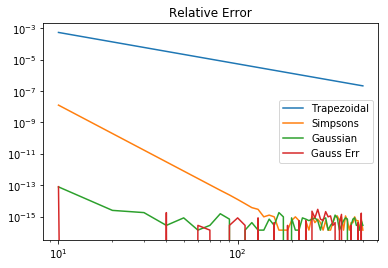

In [9]:
from pylab import figure, plot, title, xscale, yscale, legend, show

figure(1)
plot(N, rel_err(pi, T), N, rel_err(pi, S), N, rel_err(pi, G), N, err_g)
title('Relative Error')
xscale('log')
yscale('log')
legend(('Trapezoidal', 'Simpsons', 'Gaussian', 'Gauss Err'))
show()